<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/ANDROID_FEATURE_SELECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Feature Selection**

#### **1) Filter Methods**

 - a) Missing Value Ratio Threshold
 - b) Variance Threshold
 - c) Chi2  Test
 - d) Anova Test

#### **2) Wrapper Methods**

 - a) Recursive Feature Elemination

##### **3) Embedded Method using random forest**

##### **4) Handling Multicollinearity with VIF**

##### **5) Feature Importance Method**

##### **6) Feature Correlation Method**

##### **7) PCA (Principal Component Analysis)**

In [1]:
# Read Data
import numpy as np                     # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd                    # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)

# Visualization
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib
%matplotlib inline

# style
plt.style.use("fivethirtyeight")       # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")              # Set Graphs Background style using seaborn

import warnings                        # Ignore Warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score

from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from numpy import array

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier, plot_importance
from sklearn.naive_bayes import GaussianNB

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Android = pd.read_csv("/content/drive/MyDrive/TMLC/Android.zip")

In [5]:
Android.head(3)

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),...,Your accounts : access other Google services (D),Your accounts : act as an account authenticator (D),Your accounts : act as the AccountManagerService (S),Your accounts : contacts data in Google accounts (D),Your accounts : discover known accounts (S),Your accounts : manage the accounts list (D),Your accounts : read Google service configuration (S),Your accounts : use the authentication credentials of an account (D),Your accounts : view configured accounts (S),Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : Read Email attachments (D),Your messages : Send Gmail (S),Your messages : edit SMS or MMS (D),Your messages : modify Gmail (D),Your messages : read Gmail (D),Your messages : read Gmail attachment previews (D),Your messages : read SMS or MMS (D),Your messages : read instant messages (D),Your messages : receive MMS (D),Your messages : receive SMS (D),Your messages : receive WAP (D),Your messages : send SMS-received broadcast (S),Your messages : send WAP-PUSH-received broadcast (S),Your messages : write instant messages (D),Your personal information : add or modify calendar events and send email to guests (D),Your personal information : choose widgets (S),Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.0,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.0,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fort

In [6]:
Android.shape

(29999, 184)

In [7]:
train_original = Android.copy()

### **Missing Values**

In [8]:
Android['Related apps'] = Android['Related apps'].fillna(Android['Related apps'].mode()[0])

Android['Dangerous permissions count'] = Android['Dangerous permissions count'].fillna(Android['Dangerous permissions count'].median())

Android['Description'] = Android['Description'].fillna(Android['Description'].mode()[0])

Android['App'] = Android['App'].fillna(Android['App'].mode()[0])

### **Modeling**

In [9]:
List = ['App', 'Package', 'Category', 'Description', 'Related apps', 'Class']

In [10]:
X = Android.drop(columns=List)
y = Android['Class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

--------

### **1.b) Variance Threshold**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(1)
selector.fit(X)
X.columns[selector.get_support()]

Index(['Rating', 'Number of ratings', 'Price', 'Dangerous permissions count',
       'Safe permissions count'],
      dtype='object')

In [ ]:
# Return  the variance for X along the specified axis=0.
X.var(axis=0)

Rating                                                                   2.029728e+00
Number of ratings                                                        2.103964e+09
Price                                                                    1.038528e+01
Dangerous permissions count                                              9.263351e+00
Safe permissions count                                                   2.321025e+00
                                                                             ...     
Your personal information : retrieve system internal state (S)           5.663833e-04
Your personal information : set alarm in alarm clock (S)                 3.998667e-04
Your personal information : write Browser's history and bookmarks (D)    1.629329e-02
Your personal information : write contact data (D)                       3.815709e-02
Your personal information : write to user defined dictionary (S)         1.497850e-03
Length: 178, dtype: float64

In [ ]:
# import minmax_scale
from sklearn.preprocessing import MinMaxScaler

# use minmax scale with feature_range=(0,10) and columns=X.columns,to scale the features of dataframe and store them into X_scaled_df 
scaler = MinMaxScaler(feature_range=(0, 10))                           
X_scaled_df = scaler.fit_transform(X)

In [ ]:
# return X_scaled_df
X_scaled_df = pd.DataFrame(X_scaled_df, columns=X.columns)
X_scaled_df.head()

,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),...,Your accounts : access all Google services (S),Your accounts : access other Google services (D),Your accounts : act as an account authenticator (D),Your accounts : act as the AccountManagerService (S),Your accounts : contacts data in Google accounts (D),Your accounts : discover known accounts (S),Your accounts : manage the accounts list (D),Your accounts : read Google service configuration (S),Your accounts : use the authentication credentials of an account (D),Your accounts : view configured accounts (S),Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : Read Email attachments (D),Your messages : Send Gmail (S),Your messages : edit SMS or MMS (D),Your messages : modify Gmail (D),Your messages : read Gmail (D),Your messages : read Gmail attachment previews (D),Your messages : read SMS or MMS (D),Your messages : read instant messages (D),Your messages : receive MMS (D),Your messages : receive SMS (D),Your messages : receive WAP (D),Your messages : send SMS-received broadcast (S),Your messages : send WAP-PUSH-received broadcast (S),Your messages : write instant messages (D),Your personal information : add or modify calendar events and send email to guests (D),Your personal information : choose widgets (S),Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S)
0,6.2,0.000403,0.000000,2.333333,0.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
1,8.6,0.001043,0.000000,1.000000,1.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
# Again return  the variance for X along the specified axis=0 to check the scales after using minmax scaler.
X_scaled_df.var(axis=0)

Rating                                                                   8.118911
Number of ratings                                                        0.057758
Price                                                                    0.041564
Dangerous permissions count                                              1.029261
Safe permissions count                                                   0.906650
                                                                           ...   
Your personal information : retrieve system internal state (S)           0.056638
Your personal information : set alarm in alarm clock (S)                 0.039987
Your personal information : write Browser's history and bookmarks (D)    1.629329
Your personal information : write contact data (D)                       3.815709
Your personal information : write to user defined dictionary (S)         0.149785
Length: 178, dtype: float64

In [ ]:
# import variancethreshold
from sklearn.feature_selection import VarianceThreshold

# set threshold=1 and define it to variable select_features
select_features = VarianceThreshold(threshold=2)

In [ ]:
X_variance_threshold_df = select_features.fit_transform(X_scaled_df)

In [ ]:
# print X_variance_threshold_df
X_variance_threshold_df

array([[ 6.2,  0. ,  0. , ..., 10. ,  0. , 10. ],
       [ 8.6,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 8.2,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 8.4,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 6.8,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 6. ,  0. , 10. , ...,  0. ,  0. ,  0. ]])

In [ ]:
# Convert X_variance_threshold_df into dataframe
X_variance_threshold_df = pd.DataFrame(X_variance_threshold_df)

# print of head values of X_variance_threshold_df 
X_variance_threshold_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,6.2,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,10.0,0.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,10.0,0.0,10.0
1,8.6,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,10.0,10.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.2,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
def get_selected_features(raw_df,processed_df):
    selected_features=[]
    for i in range(len(processed_df.columns)):
        for j in range(len(raw_df.columns)):
            if (processed_df.iloc[:,i].equals(raw_df.iloc[:,j])):
                selected_features.append(raw_df.columns[j])
    return selected_features

In [ ]:
# pass the X_scaled_df as raw_df and X_variance_threshold_df as processed_df inside get_selected_features function
selected_features = get_selected_features(X_scaled_df, X_variance_threshold_df)

# print selected_features
selected_features

['Rating',
 'Hardware controls : change your audio settings (D)',
 'Hardware controls : control vibrator (S)',
 'Hardware controls : record audio (D)',
 'Hardware controls : take pictures and videos (D)',
 'Network communication : create Bluetooth connections (D)',
 'Network communication : full Internet access (D)',
 'Network communication : receive data from Internet (S)',
 'Network communication : view Wi-Fi state (S)',
 'Network communication : view network state (S)',
 'Phone calls : read phone state and identity (D)',
 'Services that cost you money : directly call phone numbers (D)',
 'Services that cost you money : send SMS messages (D)',
 'Storage : modify/delete USB storage contents modify/delete SD card contents (D)',
 'System tools : automatically start at boot (S)',
 'System tools : change Wi-Fi state (D)',
 'System tools : disable keylock (D)',
 'System tools : kill background processes (S)',
 'System tools : modify global system settings (D)',
 'System tools : prevent dev

In [ ]:
# define selected_features as columns and save it in variabe named X_variance_threshold_df
X_variance_threshold_df.columns = selected_features

# print X_variance_threshold_df
X_variance_threshold_df.head()

,Rating,Hardware controls : change your audio settings (D),Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Network communication : create Bluetooth connections (D),Network communication : full Internet access (D),Network communication : receive data from Internet (S),Network communication : view Wi-Fi state (S),Network communication : view network state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Services that cost you money : send SMS messages (D),Storage : modify/delete USB storage contents modify/delete SD card contents (D),System tools : automatically start at boot (S),System tools : change Wi-Fi state (D),System tools : disable keylock (D),System tools : kill background processes (S),System tools : modify global system settings (D),System tools : prevent device from sleeping (D),System tools : retrieve running applications (D),System tools : set wallpaper (S),Your accounts : discover known accounts (S),Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : read SMS or MMS (D),Your messages : receive SMS (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : write contact data (D)
0,6.2,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,10.0,0.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,10.0,0.0,10.0
1,8.6,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,10.0,10.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.2,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_variance_threshold_df.shape

(29999, 32)

#### **Threshold=1** ---> No of features =45

In [ ]:
Var_Thr = ['Rating',
           'Dangerous permissions count',
           'Hardware controls : change your audio settings (D)',
           'Hardware controls : control flashlight (S)',
           'Hardware controls : control vibrator (S)',
           'Hardware controls : record audio (D)',
           'Hardware controls : take pictures and videos (D)',
           'Network communication : create Bluetooth connections (D)',
           'Network communication : full Internet access (D)',
           'Network communication : receive data from Internet (S)',
           'Network communication : view Wi-Fi state (S)',
           'Network communication : view network state (S)',
           'Phone calls : intercept outgoing calls (D)',
           'Phone calls : read phone state and identity (D)',
           'Services that cost you money : directly call phone numbers (D)',
           'Services that cost you money : send SMS messages (D)',
           'Storage : modify/delete USB storage contents modify/delete SD card contents (D)',
           'System tools : automatically start at boot (S)',
           'System tools : bluetooth administration (D)',
           'System tools : change Wi-Fi state (D)',
           'System tools : change network connectivity (D)',
           'System tools : disable keylock (D)',
           'System tools : kill background processes (S)',
           'System tools : modify global system settings (D)',
           'System tools : mount and unmount filesystems (D)',
           'System tools : prevent device from sleeping (D)',
           'System tools : retrieve running applications (D)',
           'System tools : set wallpaper (S)',
           'Your accounts : discover known accounts (S)',
           'Your accounts : manage the accounts list (D)',
           'Your accounts : use the authentication credentials of an account (D)',
           'Your location : access extra location provider commands (S)',
           'Your location : coarse (network-based) location (D)',
           'Your location : fine (GPS) location (D)',
           'Your location : mock location sources for testing (D)',
           'Your messages : edit SMS or MMS (D)',
           'Your messages : read SMS or MMS (D)',
           'Your messages : receive SMS (D)',
           'Your personal information : add or modify calendar events and send email to guests (D)',
           "Your personal information : read Browser's history and bookmarks (D)",
           'Your personal information : read calendar events (D)',
           'Your personal information : read contact data (D)',
           'Your personal information : read sensitive log data (D)',
           "Your personal information : write Browser's history and bookmarks (D)",
           'Your personal information : write contact data (D)']

#### **Threshold=2** ---> No of features =32

In [ ]:
Var_Thr = ['Rating',
           'Hardware controls : change your audio settings (D)',
           'Hardware controls : control vibrator (S)',
           'Hardware controls : record audio (D)',
           'Hardware controls : take pictures and videos (D)',
           'Network communication : create Bluetooth connections (D)',
           'Network communication : full Internet access (D)',
           'Network communication : receive data from Internet (S)',
           'Network communication : view Wi-Fi state (S)',
           'Network communication : view network state (S)',
           'Phone calls : read phone state and identity (D)',
           'Services that cost you money : directly call phone numbers (D)',
           'Services that cost you money : send SMS messages (D)',
           'Storage : modify/delete USB storage contents modify/delete SD card contents (D)',
           'System tools : automatically start at boot (S)',
           'System tools : change Wi-Fi state (D)',
           'System tools : disable keylock (D)',
           'System tools : kill background processes (S)',
           'System tools : modify global system settings (D)',
           'System tools : prevent device from sleeping (D)',
           'System tools : retrieve running applications (D)',
           'System tools : set wallpaper (S)',
           'Your accounts : discover known accounts (S)',
           'Your location : access extra location provider commands (S)',
           'Your location : coarse (network-based) location (D)',
           'Your location : fine (GPS) location (D)',
           'Your location : mock location sources for testing (D)',
           'Your messages : read SMS or MMS (D)',
           'Your messages : receive SMS (D)',
           'Your personal information : read contact data (D)',
           'Your personal information : read sensitive log data (D)',
           'Your personal information : write contact data (D)']

-------------

### **1.c) Chi-Squared statistical test (SelectKBest)**

**For regression:** f_regression, mutual_info_regression

**For classification:** chi2, f_classif, mutual_info_classif

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [24]:
# instantiate SelectKBest to determine 20 best features
best_features = SelectKBest(score_func=f_classif, k=20)

fit = best_features.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)
print(df_scores.head())

df_columns = pd.DataFrame(X.columns)
print(df_columns.head())

             0
0  1554.946004
1    39.939469
2   576.244511
3    23.222669
4   225.407779
                             0
0                       Rating
1            Number of ratings
2                        Price
3  Dangerous permissions count
4       Safe permissions count


In [25]:
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature_Name', 'Score']  # name output columns
print(feature_scores.nlargest(20, 'Score'))  # print 20 best features

                                          Feature_Name        Score
0                                               Rating  1554.946004
85      Network communication : view network state (S)   677.033075
2                                                Price   576.244511
81    Network communication : full Internet access (D)   279.320926
175  Your personal information : write Browser's hi...   232.625440
4                               Safe permissions count   225.407779
88     Phone calls : read phone state and identity (D)   199.419600
168  Your personal information : read Browser's his...   190.615819
150            Your location : fine (GPS) location (D)   155.255557
151  Your location : mock location sources for test...   130.189787
73            Hardware controls : control vibrator (S)    89.289243
89   Services that cost you money : directly call p...    88.928866
143        Your accounts : discover known accounts (S)    85.746942
122                   System tools : set wallpap

### **1.d) Anova-F Test**

In [47]:
select2 = SelectPercentile(chi2, percentile=20)
model = select2.fit_transform(X, y)

In [48]:
pd.DataFrame(model).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,3.1,77.0,0.00,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.3,199.0,0.00,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.1,243.0,0.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.6,2589.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,5.99,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
select2.get_support()

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
        True, False, False, False,  True, False, False,  True,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False,  True, False, False, False,
        True, False,  True, False, False,  True, False, False, False,
        True, False,

In [50]:
new_cols = list(np.take(X.columns, np.where(select2.get_support() == True)))
new_cols

['Rating',
 'Number of ratings',
 'Price',
 'Dangerous permissions count',
 'Safe permissions count',
 'Default : Access DRM content. (S)',
 'Default : Install DRM content. (S)',
 'Default : bind to a wallpaper (S)',
 'Default : delete applications (S)',
 'Default : power device on or off (S)',
 'Hardware controls : control vibrator (S)',
 'Hardware controls : take pictures and videos (D)',
 'Network communication : full Internet access (D)',
 'Network communication : view network state (S)',
 'Phone calls : read phone state and identity (D)',
 'Services that cost you money : directly call phone numbers (D)',
 'Storage : modify/delete USB storage contents modify/delete SD card contents (D)',
 'System tools : automatically start at boot (S)',
 'System tools : modify global system settings (D)',
 'System tools : prevent device from sleeping (D)',
 'System tools : read sync settings (S)',
 'System tools : retrieve running applications (D)',
 'System tools : send sticky broadcast (S)',
 'S

In [51]:
model.shape, X.shape

((29999, 36), (29999, 178))

In [52]:
select2.scores_

array([8.48316377e+02, 1.22467648e+07, 9.38435647e+03, 6.92615818e+01,
       3.83530730e+02, 1.25014168e+01, 8.57571506e-01,            nan,
       3.37571258e+00, 2.00020002e+00, 1.60032004e+00, 1.21018702e+01,
                  nan, 4.00040004e+00, 2.00020002e+00, 1.60032004e+00,
       3.11844063e-02, 4.00040004e+00, 3.11844063e-02, 7.89882299e-01,
       2.00020002e+00,            nan,            nan, 2.14312860e+01,
       1.88421154e+00, 9.01575193e-02,            nan, 2.28361972e+00,
       1.78610719e+00, 1.69897408e+01, 1.35064511e+00, 1.05017502e+01,
       2.48147495e+00, 4.84326596e+00, 2.80367687e-02,            nan,
       1.00010001e+01, 5.00350080e-01, 9.99900000e-01, 1.06192678e+01,
                  nan, 4.90063006e+00, 2.00020002e+00,            nan,
       3.53753449e-01, 4.69820918e+00, 1.49965001e+00,            nan,
       6.66733340e-09, 2.50075010e-01,            nan, 1.17517676e-01,
       1.40192852e+01, 2.66595557e+00, 3.12543755e+00, 8.00080008e+00,
      

In [53]:
select_features_df = pd.DataFrame({'Feature':list(X.columns), 'scores':select2.scores_})
select_features_df.sort_values(by='scores', ascending=False)

,Feature,scores
1,Number of ratings,1.224676e+07
2,Price,9.384356e+03
0,Rating,8.483164e+02
4,Safe permissions count,3.835307e+02
85,Network communication : view network state (S),2.860514e+02
...,...,...
80,Network communication : download files without...,NaN
96,System tools : change background data usage se...,NaN
127,Your accounts : Blogger (D),NaN
157,Your messages : read Gmail attachment previews...,NaN


--------------------

### **3) Embedded Method using random forest**

In [ ]:
# create an instance of Select from Model. Pass an object of Random Forest Classifier with n_estimators=100 as argument. 
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

sel = SelectFromModel(estimator = RandomForestClassifier(n_estimators=100))

# fit sel on training data
fit = sel.fit(X_train, y_train)

In [ ]:
# Using sel.get_support() print the boolean values for the features selected. 

sel_support = sel.get_support()
sel_support

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False,

In [ ]:
# make a list named selected_feat with all columns which are True
selected_feat = X_train.loc[:, sel_support].columns.tolist()

# print length of selected_feat
print(str(len(selected_feat)), 'selected features')

19 selected features


In [ ]:
# Print selected_feat
print(selected_feat)

['Rating', 'Number of ratings', 'Price', 'Dangerous permissions count', 'Safe permissions count', 'Hardware controls : control vibrator (S)', 'Hardware controls : take pictures and videos (D)', 'Network communication : view Wi-Fi state (S)', 'Network communication : view network state (S)', 'Phone calls : read phone state and identity (D)', 'Services that cost you money : directly call phone numbers (D)', 'Storage : modify/delete USB storage contents modify/delete SD card contents (D)', 'System tools : automatically start at boot (S)', 'System tools : prevent device from sleeping (D)', 'System tools : retrieve running applications (D)', 'System tools : set wallpaper (S)', 'Your location : coarse (network-based) location (D)', 'Your location : fine (GPS) location (D)', 'Your personal information : read contact data (D)']


In [ ]:
Emb_rf = ['Rating',
          'Number of ratings',
          'Price',
          'Dangerous permissions count',
          'Safe permissions count',
          'Hardware controls : control vibrator (S)',
          'Hardware controls : take pictures and videos (D)',
          'Network communication : view Wi-Fi state (S)',
          'Network communication : view network state (S)',
          'Phone calls : read phone state and identity (D)',
          'Services that cost you money : directly call phone numbers (D)',
          'Storage : modify/delete USB storage contents modify/delete SD card contents (D)',
          'System tools : automatically start at boot (S)',
          'System tools : prevent device from sleeping (D)',
          'System tools : retrieve running applications (D)',
          'System tools : set wallpaper (S)',
          'Your location : coarse (network-based) location (D)',
          'Your location : fine (GPS) location (D)',
          'Your personal information : read contact data (D)']

---------------------------

### **5) Feature Importance Method**

In [26]:
# Feature importance is inbuilt with Tree Based Classifiers
from sklearn.ensemble import RandomForestClassifier

In [27]:
# FEATURE IMPORTANCE FEATURE SELECTION
import numpy as np
np.random.seed(42)

In [28]:
# instantiate RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

In [30]:
# determine 20 most important features
df_imp_feat = feat_importances.nlargest(20)

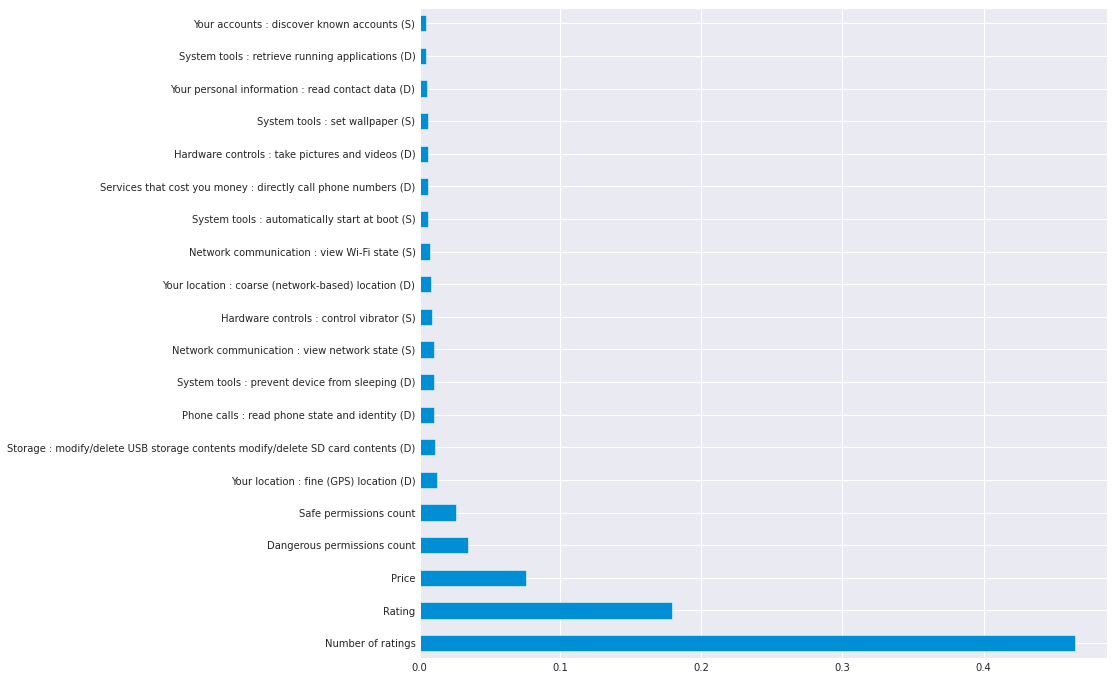

In [36]:
# plot 20 most important features
# feat_importances.nlargest(20).plot(kind='barh')

plt.figure(figsize=(11,12))
df_imp_feat.plot(kind='barh')
plt.show()

In [37]:
print(df_imp_feat)

Number of ratings                                                                  0.464837
Rating                                                                             0.179456
Price                                                                              0.075859
Dangerous permissions count                                                        0.034599
Safe permissions count                                                             0.025920
Your location : fine (GPS) location (D)                                            0.012969
Storage : modify/delete USB storage contents modify/delete SD card contents (D)    0.011472
Phone calls : read phone state and identity (D)                                    0.010527
System tools : prevent device from sleeping (D)                                    0.010351
Network communication : view network state (S)                                     0.010340
Hardware controls : control vibrator (S)                                        

### **6) Feature Correlation Method**

In [38]:
# FEATURE IMPORTANCE CORRELATION
# determine 20 most correlated features

df_corr_Android = Android.corr()['Class'].sort_values(ascending=False).head(20)
top_corr_features = df_corr_Android.index

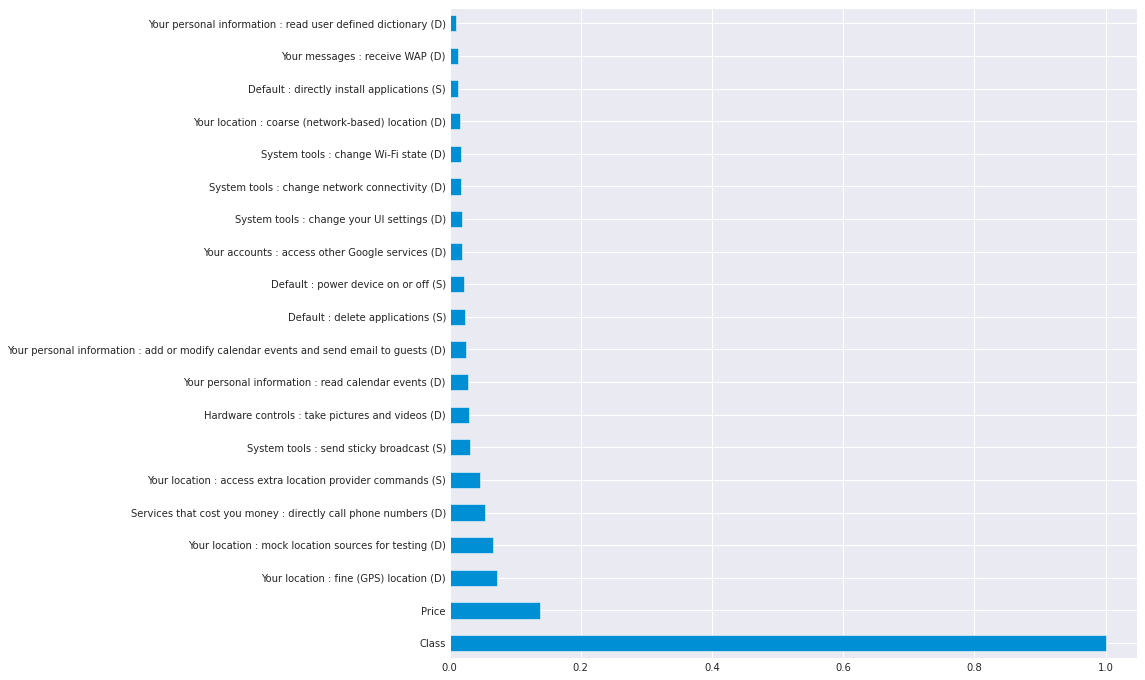

In [40]:
# plot top 20 most correlated features to our target (Class)
plt.figure(figsize=(11,12))
df_corr_Android.plot(kind='barh')
plt.show()

In [41]:
print(df_corr_Android)

Class                                                                                     1.000000
Price                                                                                     0.137288
Your location : fine (GPS) location (D)                                                   0.071757
Your location : mock location sources for testing (D)                                     0.065737
Services that cost you money : directly call phone numbers (D)                            0.054368
Your location : access extra location provider commands (S)                               0.046273
System tools : send sticky broadcast (S)                                                  0.030719
Hardware controls : take pictures and videos (D)                                          0.029734
Your personal information : read calendar events (D)                                      0.028033
Your personal information : add or modify calendar events and send email to guests (D)    0.025888
Default : 

In [42]:
# export selected features to .csv
df_corr_Android.to_csv('feature_selection_CORRELATION.csv')

#### **7) PCA (Principal Component Analysis)**

In [12]:
from sklearn.decomposition import PCA

In [13]:
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)

# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [9.99999987e-01 5.16348687e-09 4.95660629e-09]
[[ 2.69317709e-06  1.00000000e+00 -1.85139798e-06  1.10413420e-05
   6.14479514e-06 -7.14753584e-10  1.32267431e-09 -0.00000000e+00
   3.21605938e-09 -1.06577483e-10  8.58639514e-09  2.53565687e-08
  -0.00000000e+00  6.52665191e-10  1.02581322e-10  3.55565143e-09
  -7.54970179e-10  6.52665191e-10 -1.45963935e-09  3.31132148e-09
  -1.06577483e-10 -0.00000000e+00 -0.00000000e+00 -1.53757746e-09
  -1.37628597e-09 -4.81382365e-09 -0.00000000e+00 -2.08784978e-09
   8.25417129e-09 -6.77414901e-09 -3.06634079e-09 -1.30054875e-09
   3.54806364e-08  1.87993748e-08  3.79852418e-09 -0.00000000e+00
  -4.89854667e-10  2.42942978e-09 -1.56813119e-10 -1.71196727e-09
  -0.00000000e+00 -5.00486093e-10 -1.07575664e-10 -0.00000000e+00
   9.47732724e-09  7.32208551e-08 -1.00983252e-09 -0.00000000e+00
  -2.69585672e-10 -1.40889733e-10 -0.00000000e+00  1.15406759e-09
  -9.17685355e-09 -2.86951151e-09 -2.74855566e-10 -3.46249373e-10
  -0.0000